In [22]:
import numba
from decimal import getcontext
from math import factorial
from decimal import Decimal, getcontext

# Chudnovsky algorithm for figuring out pi
getcontext().prec = 100

n = 100

@numba.njit()
def calc(n):
    t = Decimal(0)
    pi = Decimal(0)
    deno = Decimal(0)

    for k in range(n):
        t = ((-1) ** k) * (factorial(6 * k)) * (13591409 + 545140134 * k)
        deno = factorial(3 * k) * (factorial(k) ** 3) * (640320 ** (3 * k))
        pi += Decimal(t) / Decimal(deno)
    pi = pi * Decimal(12) / Decimal(640320 ** Decimal(1.5))
    pi = 1 / pi
    return pi


print(calc(n))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'Decimal':[0m [1m[1mCannot determine Numba type of <class 'type'>[0m
[1m
File "..\..\..\AppData\Local\Temp\ipykernel_9972\3595514169.py", line 13:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

  0%|          | 0/70 [00:00<?, ?it/s]

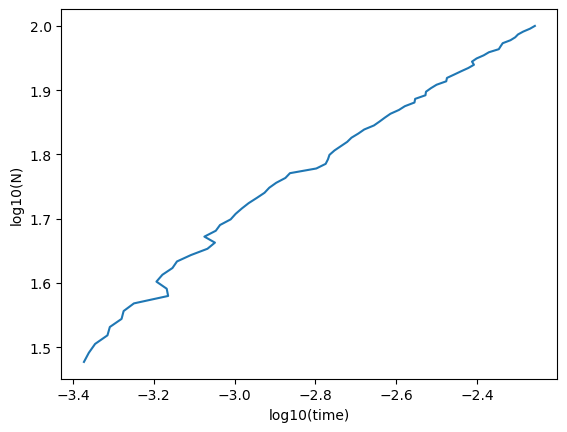

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import timeit

times = []
Ns = np.round(np.linspace(30, 100, 70))
for i, N in enumerate(tqdm(Ns)):
    t = timeit.Timer(lambda: calc(int(N))).timeit(100)
    times.append(t / 100)

plt.plot(np.log10(times), np.log10(Ns))

plt.xlabel('log10(time)')
plt.ylabel('log10(N)')
plt.show()